# M.Aizaz Ud Din

## IVY-Interactive Solution

### Chater 3 : Unsupervised Learning

### library

In [4]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


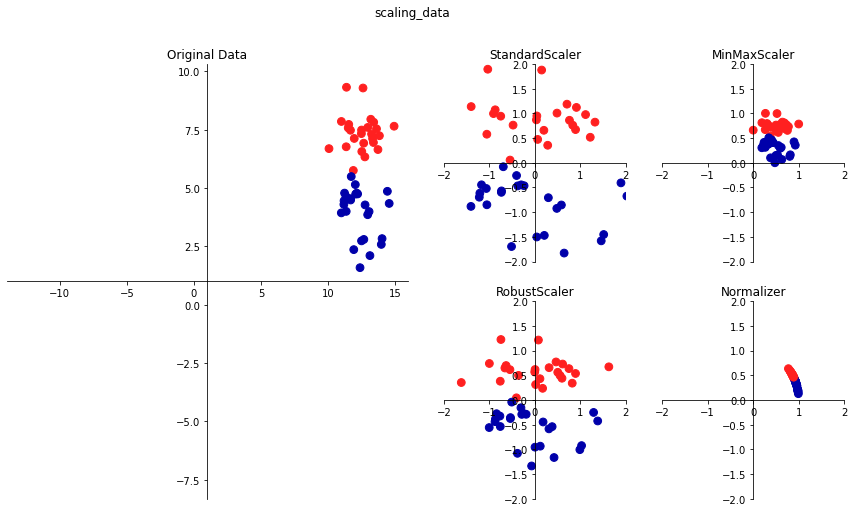

In [2]:
mglearn.plots.plot_scaling()
plt.suptitle("scaling_data");

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
 random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [4]:
scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)


MinMaxScaler()

In [6]:
# don't print using scientific notation
np.set_printoptions(suppress=True, precision=2)
# transform data
X_train_scaled = scaler.transform(X_train)
# print data set properties before and after scaling
print("transformed shape: %s" % (X_train_scaled.shape,))
print("per-feature minimum before scaling:\n %s" % X_train.min(axis=0))
print("per-feature maximum before scaling:\n %s" % X_train.max(axis=0))
print("per-feature minimum after scaling:\n %s" % X_train_scaled.min(axis=0))
print("per-feature maximum after scaling:\n %s" % X_train_scaled.max(axis=0))


transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.98   9.71  43.79 143.5    0.05   0.02   0.     0.     0.11   0.05
   0.12   0.36   0.76   6.8    0.     0.     0.     0.     0.01   0.
   7.93  12.02  50.41 185.2    0.07   0.03   0.     0.     0.16   0.06]
per-feature maximum before scaling:
 [  28.11   39.28  188.5  2501.      0.16    0.29    0.43    0.2     0.3
    0.1     2.87    4.88   21.98  542.2     0.03    0.14    0.4     0.05
    0.06    0.03   36.04   49.54  251.2  4254.      0.22    0.94    1.17
    0.29    0.58    0.15]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print("per-feature minimum after scaling: %s" % X_test_scaled.min(axis=0))
print("per-feature maximum after scaling: %s" % X_test_scaled.max(axis=0))


per-feature minimum after scaling: [ 0.03  0.02  0.03  0.01  0.14  0.04  0.    0.    0.15 -0.01 -0.    0.01
  0.    0.    0.04  0.01  0.    0.   -0.03  0.01  0.03  0.06  0.02  0.01
  0.11  0.03  0.    0.   -0.   -0.  ]
per-feature maximum after scaling: [0.96 0.82 0.96 0.89 0.81 1.22 0.88 0.93 0.93 1.04 0.43 0.5  0.44 0.28
 0.49 0.74 0.77 0.63 1.34 0.39 0.9  0.79 0.85 0.74 0.92 1.13 1.07 0.92
 1.21 1.63]


In [8]:
from sklearn.datasets import make_blobs


In [9]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test set
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

Text(0.5, 1.0, 'improperly scaled data')

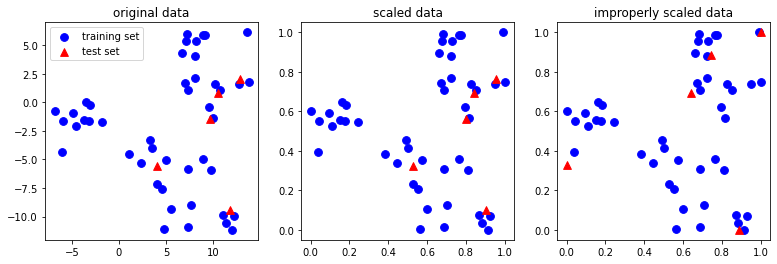

In [15]:
# plot the training and test set
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
 c='b', label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
 c='r', label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("original data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c='b', label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
 c='r', label="test set", s=60)
axes[1].set_title("scaled data")

# rescale the test set separately, so that test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c='b', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
 c='r', label="test set", s=60)
axes[2].set_title("improperly scaled data")


### The effect of preprocessing on supervised learning


In [23]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train,y_train)
print(svm.score(X_test, y_test))

0.9440559440559441


In [24]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)


0.965034965034965

In [26]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
svm.score(X_test_scaled, y_test)


0.958041958041958

### Principal Component Analysis (PCA)

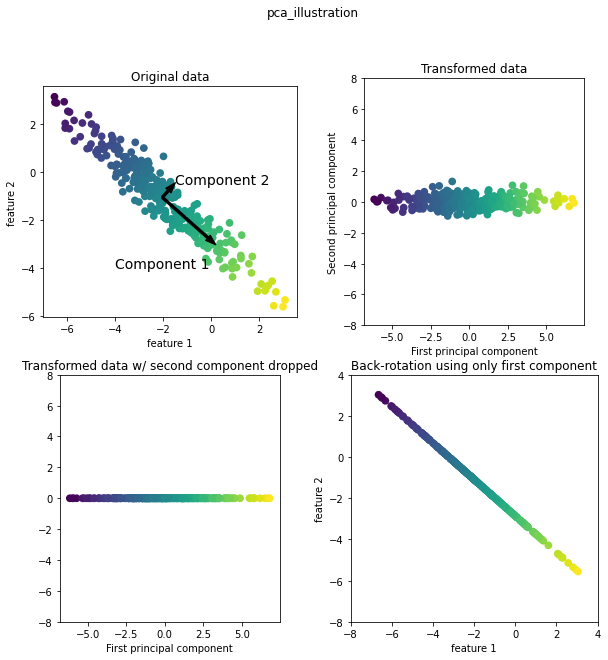

In [29]:
mglearn.plots.plot_pca_illustration()
plt.suptitle("pca_illustration");


Text(0.5, 0.98, 'cancer_histograms')

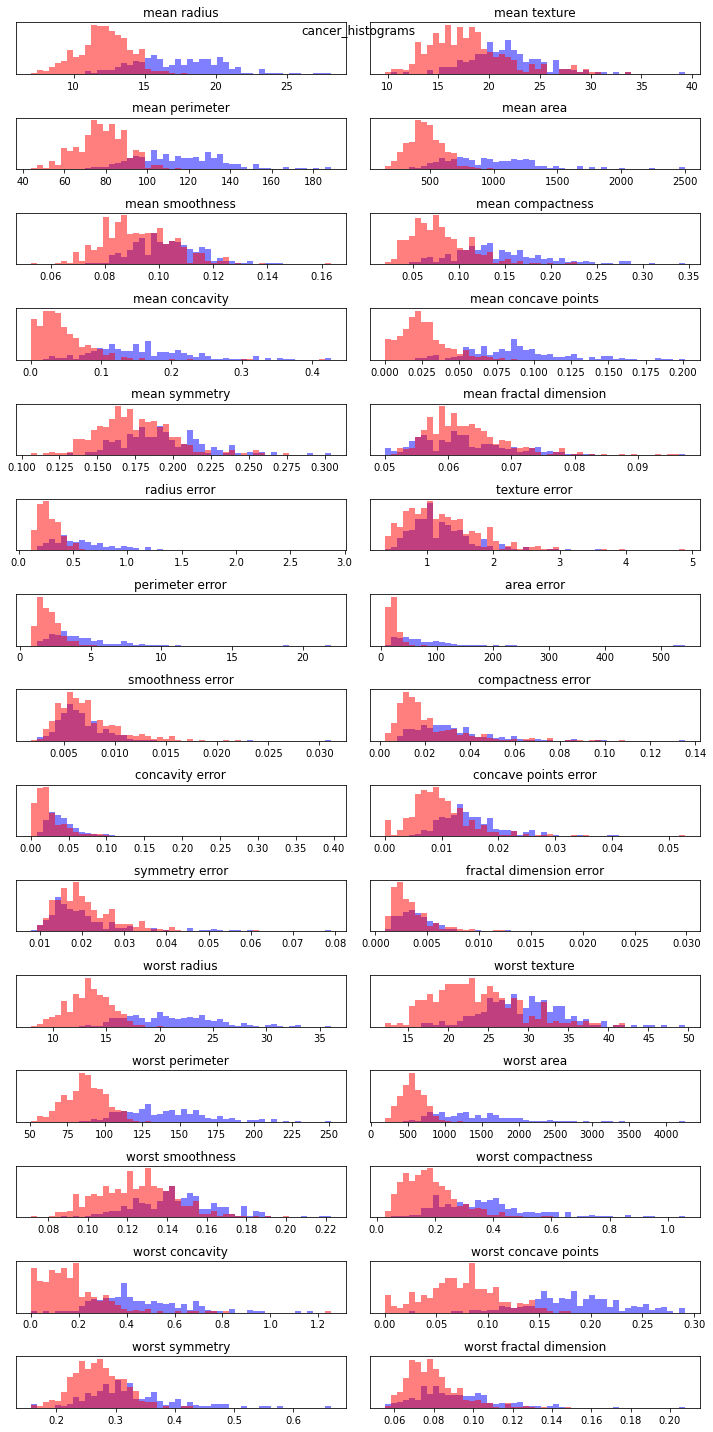

In [31]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color='b', alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color='r', alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
fig.tight_layout()
plt.suptitle("cancer_histograms")

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)


In [33]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to beast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: %s" % str(X_scaled.shape))
print("Reduced shape: %s" % str(X_pca.shape))


Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

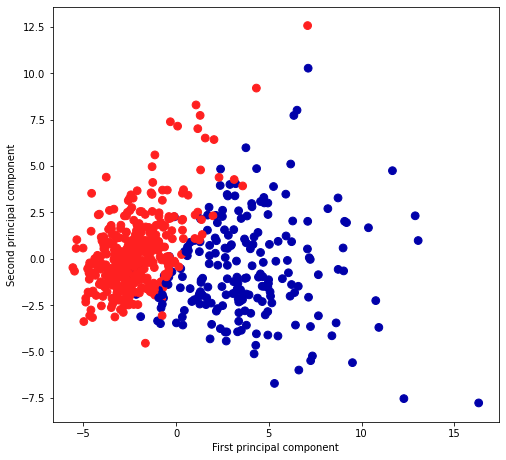

In [34]:
# plot fist vs second principal component, color by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap=mglearn.tools.cm, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [35]:
pca.components_.shape

(2, 30)

In [36]:
print(pca.components_)

[[ 0.22  0.1   0.23  0.22  0.14  0.24  0.26  0.26  0.14  0.06  0.21  0.02
   0.21  0.2   0.01  0.17  0.15  0.18  0.04  0.1   0.23  0.1   0.24  0.22
   0.13  0.21  0.23  0.25  0.12  0.13]
 [-0.23 -0.06 -0.22 -0.23  0.19  0.15  0.06 -0.03  0.19  0.37 -0.11  0.09
  -0.09 -0.15  0.2   0.23  0.2   0.13  0.18  0.28 -0.22 -0.05 -0.2  -0.22
   0.17  0.14  0.1  -0.01  0.14  0.28]]


Text(0.5, 0.98, 'pca_components_cancer')

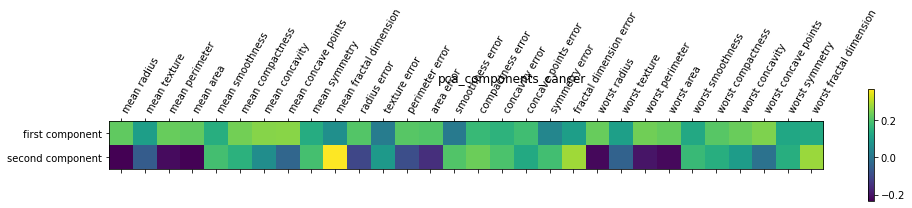

In [37]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left');
plt.suptitle("pca_components_cancer")

Text(0.5, 0.98, 'some_faces')

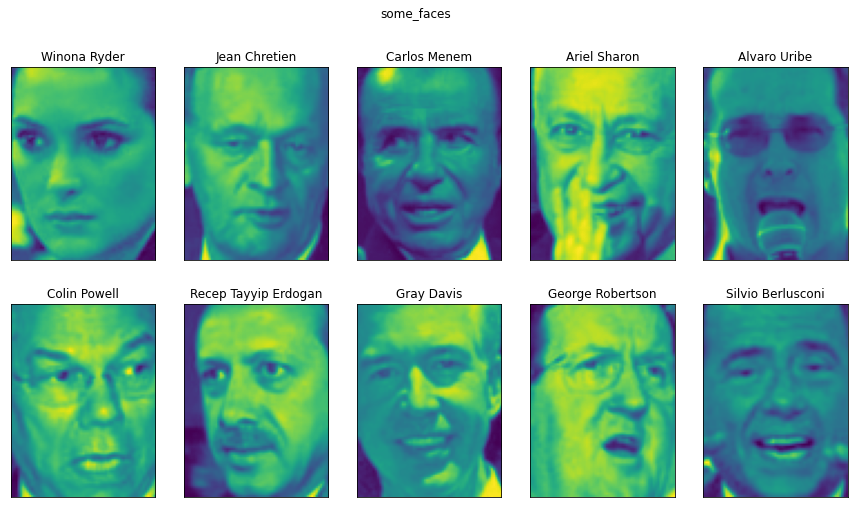

In [27]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.suptitle("some_faces")


In [28]:
print(people.images.shape)
print(len(people.target_names))


(3023, 87, 65)
62


In [29]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()


Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [30]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.



C:\Users\Aizaz\AppData\Local\Temp/ipykernel_13208/1764214549.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [32]:
from sklearn.neighbors import KNeighborsClassifier
# split the data in training and test set
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier with using one neighbor:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

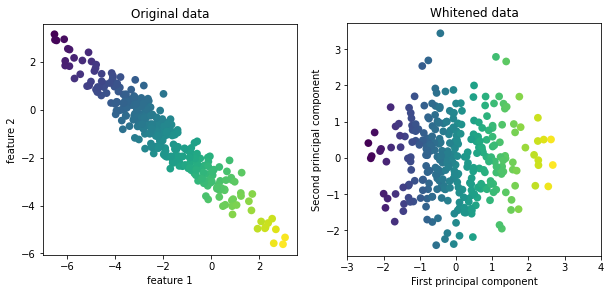

In [33]:
mglearn.plots.plot_pca_whitening()

In [34]:
pca = PCA(n_components=100, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)


(1547, 100)


In [35]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.31007751937984496

In [36]:
pca.components_.shape


(100, 5655)

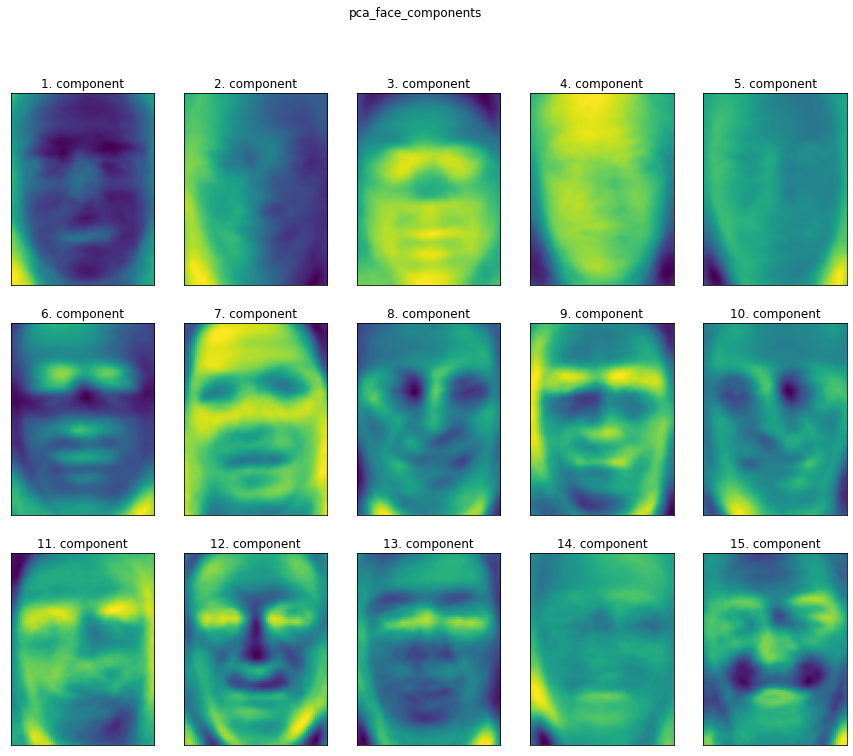

In [37]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_face_components")
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("%d. component" % (i + 1))


In [38]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
image_shape = people.images[0].shape
plt.figure(figsize=(20,3))
ax = plt.gca()
imagebox = OffsetImage(people.images[0], zoom=7, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)
for i in range(4):
 imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=7, cmap="viridis")
ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),pad=0.0, xycoords='data')
ax.add_artist(ab)
if i == 0:
    plt.text(.18, .25, 'x_%d *' % i, fontdict={'fontsize': 50})
else:
    plt.text(.15 + .2 * i, .25, '+ x_%d *' % i, fontdict={'fontsize': 50})
plt.text(.95, .25, '+ ...', fontdict={'fontsize': 50})
plt.rc('text', usetex=True)
plt.text(.13, .3, r'\approx', fontdict={'fontsize': 50})
plt.axis("off")
plt.title("decomposition")
plt.rc('text', usetex=False) 

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1440x216 with 1 Axes>

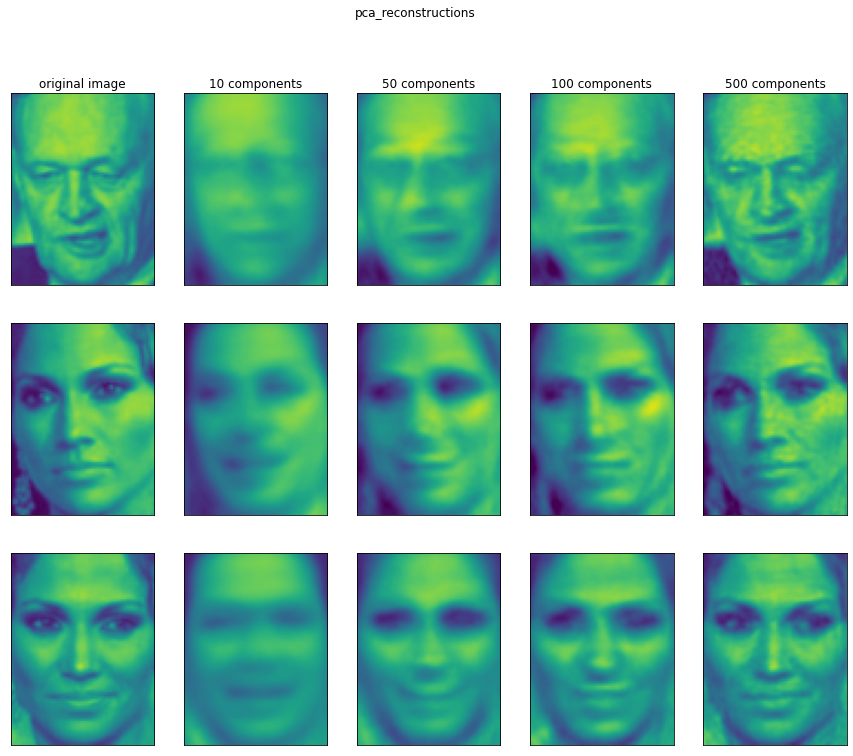

In [39]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
plt.suptitle("pca_reconstructions");

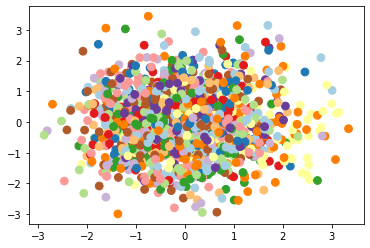

In [40]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Paired', s=60)


### Non-Negative Matrix Factorization (NMF)

D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. In

Text(0.5, 0.98, 'nmf_illustration')

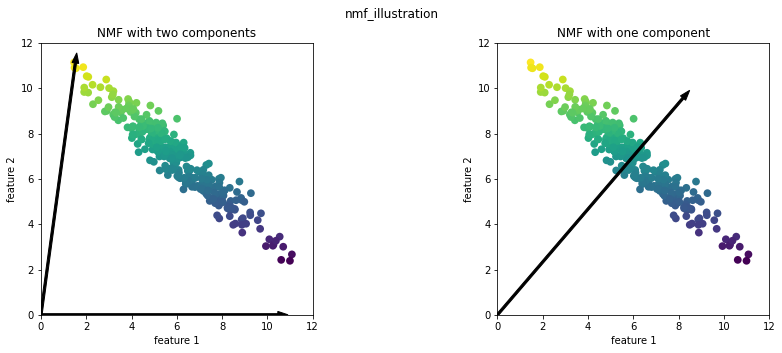

In [41]:
mglearn.plots.plot_nmf_illustration()
plt.suptitle("nmf_illustration")

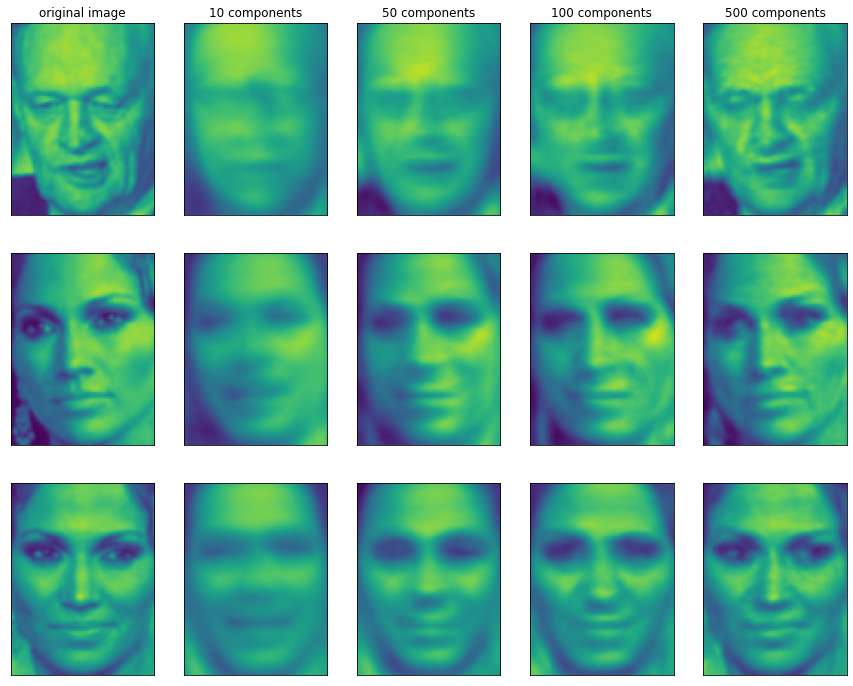

In [42]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


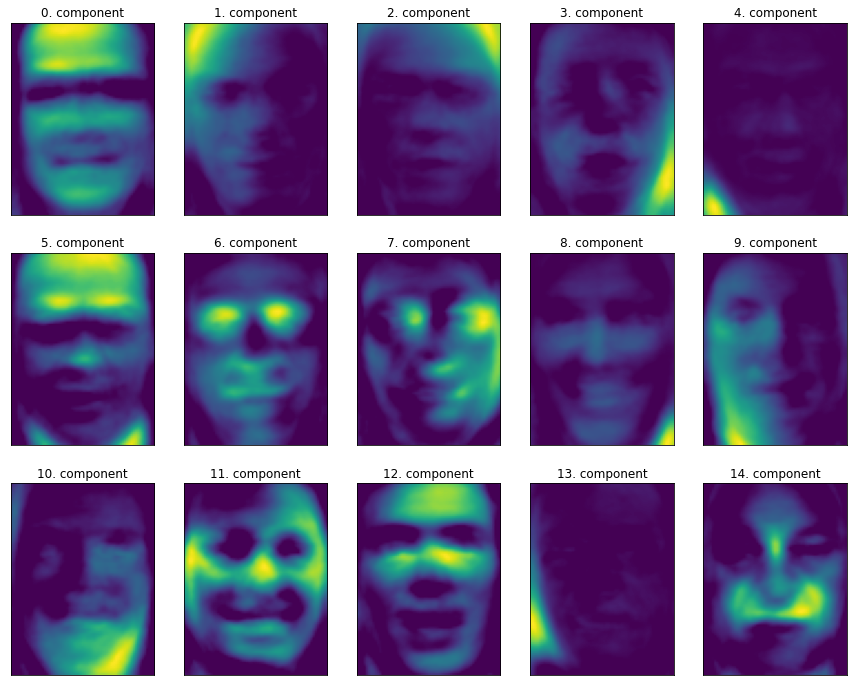

In [43]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("%d. component" % i)

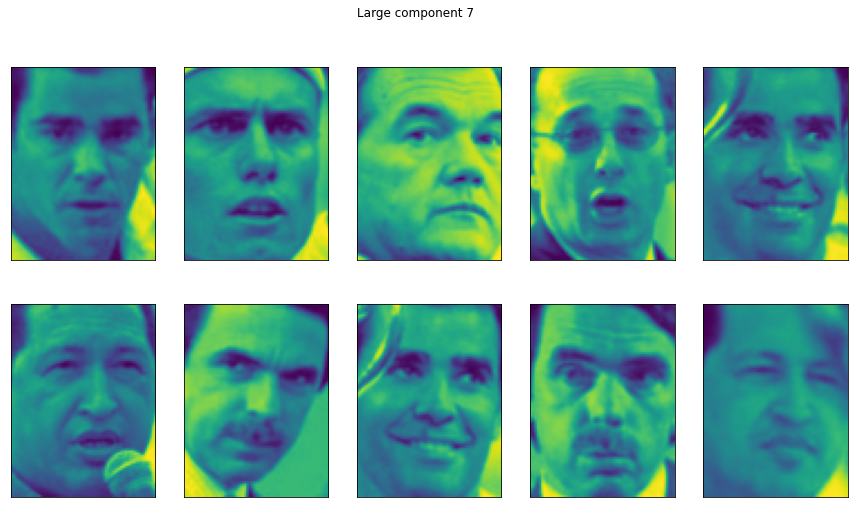

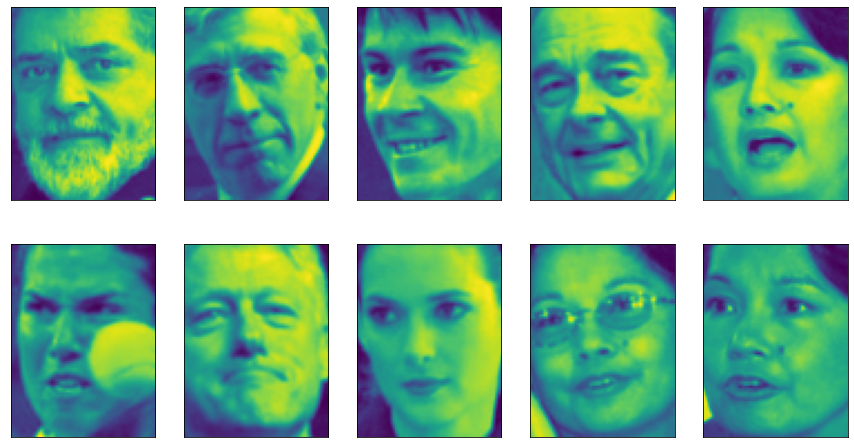

In [45]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))


## Manifold learning with t-SNE

In [46]:
from sklearn.datasets import load_digits
digits = load_digits()



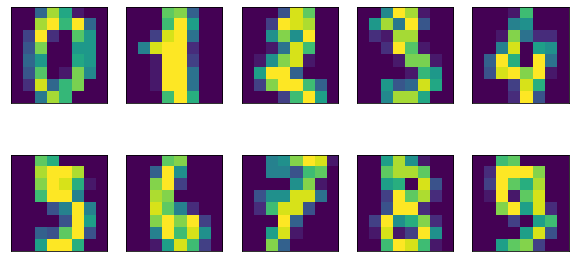

In [47]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5),subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):ax.imshow(img)

Text(0, 0.5, 'second principal component')

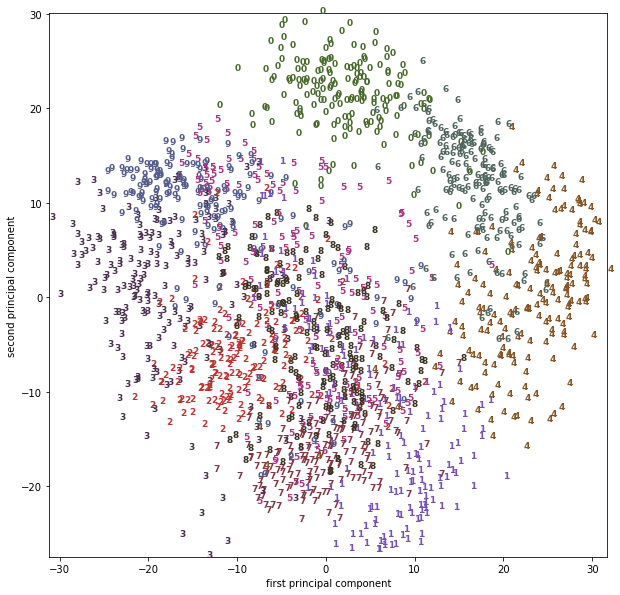

In [48]:
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("second principal component")

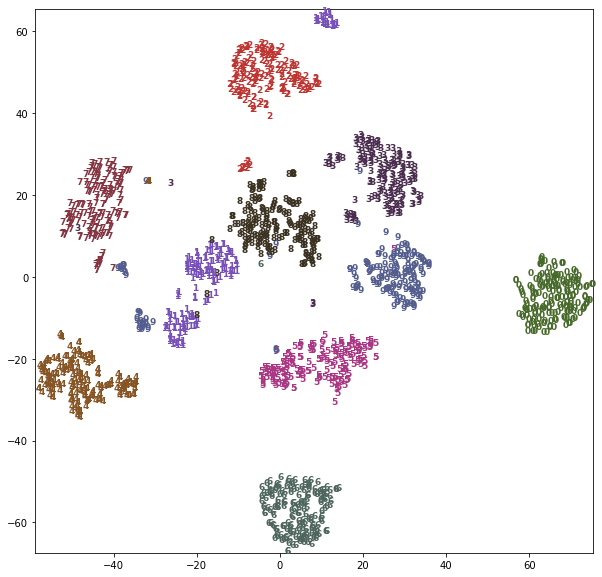

In [49]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method:
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
      plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),color = colors[digits.target[i]],fontdict={'weight': 'bold', 'size': 9})


## k-Means clustering

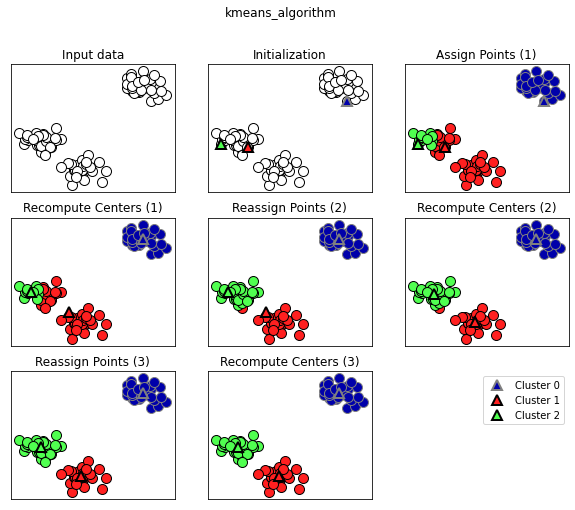

In [50]:
mglearn.plots.plot_kmeans_algorithm()
plt.suptitle("kmeans_algorithm");

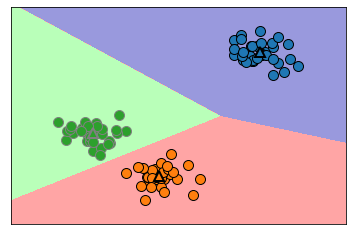

In [51]:
mglearn.plots.plot_kmeans_boundaries()

In [52]:
X, y = make_blobs(random_state=1)

In [53]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [54]:
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,verbose=0)

KMeans(n_clusters=3, n_jobs=1, precompute_distances='auto')

In [55]:
print(kmeans.labels_)


[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [56]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


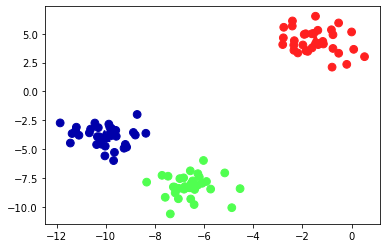

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap=mglearn.cm3, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', s=100, linewidth=2, c=[0, 1, 2], cmap=mglearn.cm3)


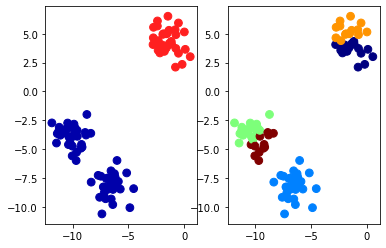

In [58]:
fig, axes = plt.subplots(1, 2)
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
axes[0].scatter(X[:, 0], X[:, 1], c=assignments, cmap=mglearn.cm2, s=60)
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
axes[1].scatter(X[:, 0], X[:, 1], c=assignments, cmap='jet', s=60);

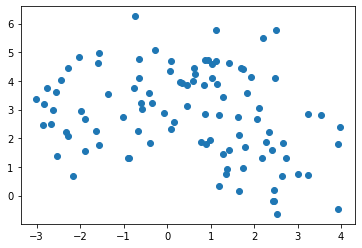

In [59]:
X, y = make_blobs(random_state=0)
plt.scatter(X[:, 0], X[:, 1]);


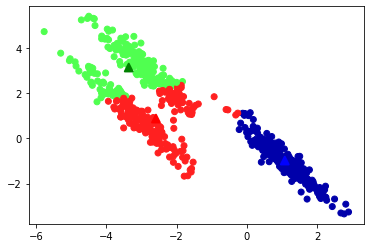

In [60]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be streched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=['b', 'r', 'g'], s=60, linewidth=2);

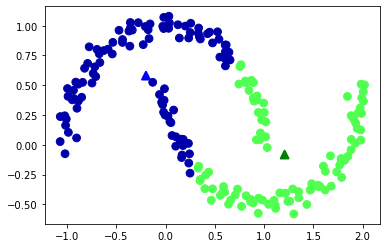

In [61]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=['b', 'g'], s=60, linewidth=2);

D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
D:\Install\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'nmf')

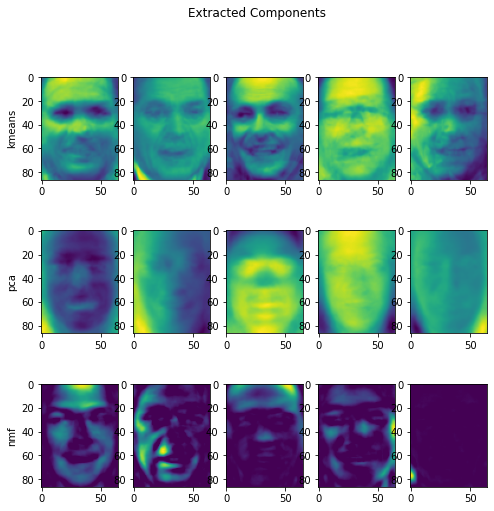

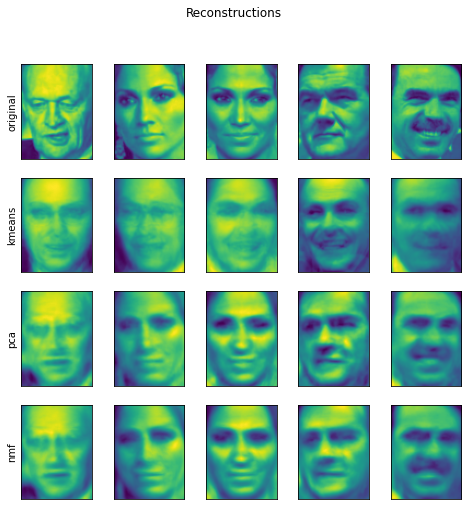

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100)
nmf.fit(X_train)
pca = PCA(n_components=100)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)
fig, axes = plt.subplots(3, 5, figsize=(8, 8)) #, subplot_kw={'xticks': (), 'yticks': ()}
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
 ax[0].imshow(comp_kmeans.reshape(image_shape))
 ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
 ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, X_reconstructed_kmeans,
 X_reconstructed_pca, X_reconstructed_nmf):
 ax[0].imshow(orig.reshape(image_shape))
 ax[1].imshow(rec_kmeans.reshape(image_shape))
 ax[2].imshow(rec_pca.reshape(image_shape))
 ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")



[6 9 0 2 9 9 6 3 6 3 5 7 9 3 8 6 4 7 4 8 1 3 5 3 5 0 9 1 0 5 6 5 3 0 4 1 7
 6 2 0 7 8 4 0 9 5 6 8 0 3 8 7 1 2 3 4 4 3 4 5 7 2 9 6 3 2 5 9 5 2 7 2 7 5
 7 2 0 6 4 7 1 5 7 1 0 5 6 5 7 1 4 6 1 8 1 9 9 7 2 0 3 1 5 6 2 0 2 8 9 4 8
 5 5 2 6 3 4 1 7 6 6 8 0 5 0 8 6 0 3 1 6 8 2 0 3 9 3 2 1 6 0 0 4 5 8 6 0 3
 4 0 7 9 6 4 7 5 3 7 4 4 0 3 4 9 7 9 4 7 9 3 4 2 2 8 0 3 1 8 8 4 9 2 1 9 1
 4 5 7 2 8 2 4 6 6 0 8 1 0 5 9]


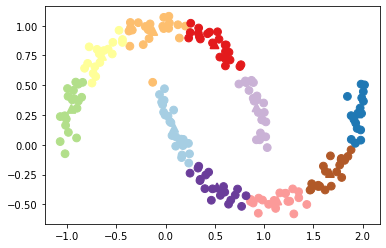

In [64]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=range(kmeans.n_clusters), s=60, linewidth=2, cmap='Paired')
print(y_pred)


In [65]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
print(distance_features)

(200, 10)
[[0.82457617 1.16555129 1.78820579 ... 0.9285066  1.48034956 1.14060718]
 [1.61885105 0.72381874 2.66446252 ... 1.0972352  2.52921971 0.149581  ]
 [0.17085119 1.97438819 0.93673651 ... 0.83342655 0.78321505 1.76451208]
 ...
 [0.17300897 1.79761869 1.17433285 ... 0.49304961 1.11471941 1.50934512]
 [0.86830861 1.97508335 1.29279485 ... 1.42316347 0.81425026 1.98349977]
 [1.57837907 0.5877911  2.63174223 ... 1.10826107 2.46626118 0.04819401]]
